# Diabetes 130

In [27]:
import zipfile
import pandas as pd
import numpy as np
import ehrapy as ep
import ehrdata as ed
from anndata import AnnData
import warnings
from fairlearn.datasets import fetch_diabetes_hospital

warnings.filterwarnings("ignore")

In [28]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [29]:
data = fetch_diabetes_hospital().data

# Data Wrangling

In [30]:
data.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,primary_diagnosis,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,medicare,medicaid,had_emergency,had_inpatient_days,had_outpatient_days,readmitted,readmit_binary
0,Caucasian,Female,'30 years or younger',Other,Referral,1,Other,41,0,1,Diabetes,1,None,None,No,No,No,False,False,False,False,False,NO,0
1,Caucasian,Female,'30 years or younger','Discharged to Home',Emergency,3,Missing,59,0,18,Other,9,None,None,Up,Ch,Yes,False,False,False,False,False,>30,1
2,AfricanAmerican,Female,'30 years or younger','Discharged to Home',Emergency,2,Missing,11,5,13,Other,6,None,None,No,No,Yes,False,False,False,True,True,NO,0
3,Caucasian,Male,'30-60 years','Discharged to Home',Emergency,2,Missing,44,1,16,Other,7,None,None,Up,Ch,Yes,False,False,False,False,False,NO,0
4,Caucasian,Male,'30-60 years','Discharged to Home',Emergency,1,Missing,51,0,8,Other,5,None,None,Steady,Ch,Yes,False,False,False,False,False,NO,0


In [31]:
data.describe(include="all")

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,primary_diagnosis,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,medicare,medicaid,had_emergency,had_inpatient_days,had_outpatient_days,readmitted,readmit_binary
count,101766,101766,101766,101766,101766,101766.000000,101766,101766.000000,101766.000000,101766.000000,101766,101766.000000,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766.000000
unique,6,3,3,2,3,NaN,6,NaN,NaN,NaN,5,NaN,4,4,4,2,2,2,2,2,2,2,3,NaN
top,Caucasian,Female,'Over 60 years','Discharged to Home',Emergency,NaN,Missing,NaN,NaN,NaN,Other,NaN,None,None,No,No,Yes,False,False,False,False,False,NO,NaN
freq,76099,54708,68541,60234,57494,NaN,49949,NaN,NaN,NaN,68512,NaN,96420,84748,47383,54755,78363,69327,98234,90383,67630,85027,54864,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.395987,NaN,43.095641,1.339730,16.021844,NaN,7.422607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460881
std,NaN,NaN,NaN,NaN,NaN,2.985108,NaN,19.674362,1.705807,8.127566,NaN,1.933600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498470
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,31.000000,0.000000,10.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,44.000000,1.000000,15.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,57.000000,2.000000,20.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [32]:
data.dtypes

race                          object
gender                        object
age                           object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
medical_specialty             object
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
primary_diagnosis             object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                     object
insulin                       object
change                        object
diabetesMed                   object
medicare                    category
medicaid                    category
had_emergency               category
had_inpatient_days          category
had_outpatient_days         category
readmitted                    object
readmit_binary                 int64
dtype: object

In [33]:
data.shape

(101766, 24)

## ehrapy sanity check

In [34]:
adata = ep.ad.df_to_anndata(data)
edata = ed.EHRData.from_adata(adata=adata)

In [35]:
edata

EHRData object with n_obs × n_vars = 101766 × 24
    layers: 'original'
    shape of .X: (101766, 24)

In [36]:
edata = ep.pp.encode(edata, autodetect=True)

! Features 'time_in_hospital', 'num_procedures', 'number_diagnoses', 'readmit_binary' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


Output()

In [37]:
edata.var_names

Index(['ehrapycat_race_AfricanAmerican', 'ehrapycat_race_Asian',
       'ehrapycat_race_Caucasian', 'ehrapycat_race_Hispanic',
       'ehrapycat_race_Other', 'ehrapycat_race_Unknown',
       'ehrapycat_gender_Female', 'ehrapycat_gender_Male',
       'ehrapycat_gender_Unknown/Invalid',
       'ehrapycat_age_'30 years or younger'', 'ehrapycat_age_'30-60 years'',
       'ehrapycat_age_'Over 60 years'',
       'ehrapycat_discharge_disposition_id_'Discharged to Home'',
       'ehrapycat_discharge_disposition_id_Other',
       'ehrapycat_admission_source_id_Emergency',
       'ehrapycat_admission_source_id_Other',
       'ehrapycat_admission_source_id_Referral',
       'ehrapycat_medical_specialty_Cardiology',
       'ehrapycat_medical_specialty_Emergency/Trauma',
       'ehrapycat_medical_specialty_Family/GeneralPractice',
       'ehrapycat_medical_specialty_InternalMedicine',
       'ehrapycat_medical_specialty_Missing',
       'ehrapycat_medical_specialty_Other',
       'ehrapycat_primary

Output()

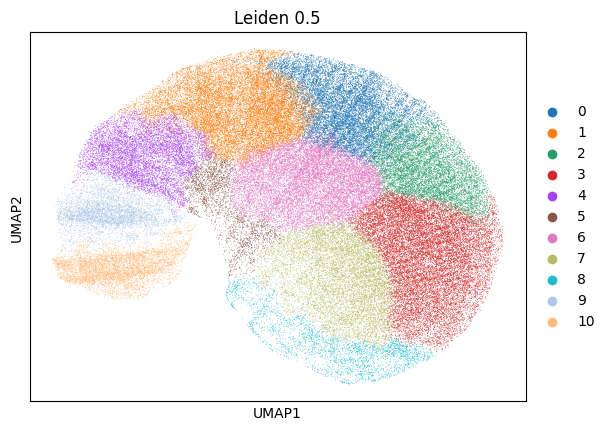

In [38]:
ep.pp.knn_impute(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")

In [39]:
ep.ad.feature_type_overview(edata)

 Detected feature types for AnnData object with 101766 obs and 63 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╠══ num_lab_procedures
║   ╚══ num_medications
╚══ 🗂️ Categorical features
    ╠══ A1Cresult (4 categories); one-hot encoded
    ╠══ admission_source_id (3 categories); one-hot encoded
    ╠══ age (3 categories); one-hot encoded
    ╠══ change (2 categories); one-hot encoded
    ╠══ diabetesMed (2 categories); one-hot encoded
    ╠══ discharge_disposition_id (2 categories); one-hot encoded
    ╠══ gender (3 categories); one-hot encoded
    ╠══ had_emergency (2 categories); one-hot encoded
    ╠══ had_inpatient_days (2 categories); one-hot encoded
    ╠══ had_outpatient_days (2 categories); one-hot encoded
    ╠══ insulin (4 categories); one-hot encoded
    ╠══ max_glu_serum (4 categories); one-hot encoded
    ╠══ medicaid (2 categories); one-hot encoded
    ╠══ medical_specialty (6 categories); one-hot encoded
    ╠══ medicare (2 categories); one-hot encoded
    ╠══ num_procedures (7 categories)
    ╠══ number_diagnoses (16 categories)
    ╠══ primary_diagnosis (5 categories); one-hot encoded
    ╠══ race (6 categories); one-hot encoded
    ╠══ readmit_binary (2 categories)
    ╠══ readmitted (3 categories); one-hot encoded
    ╚══ time_in_hospital (14 categories)

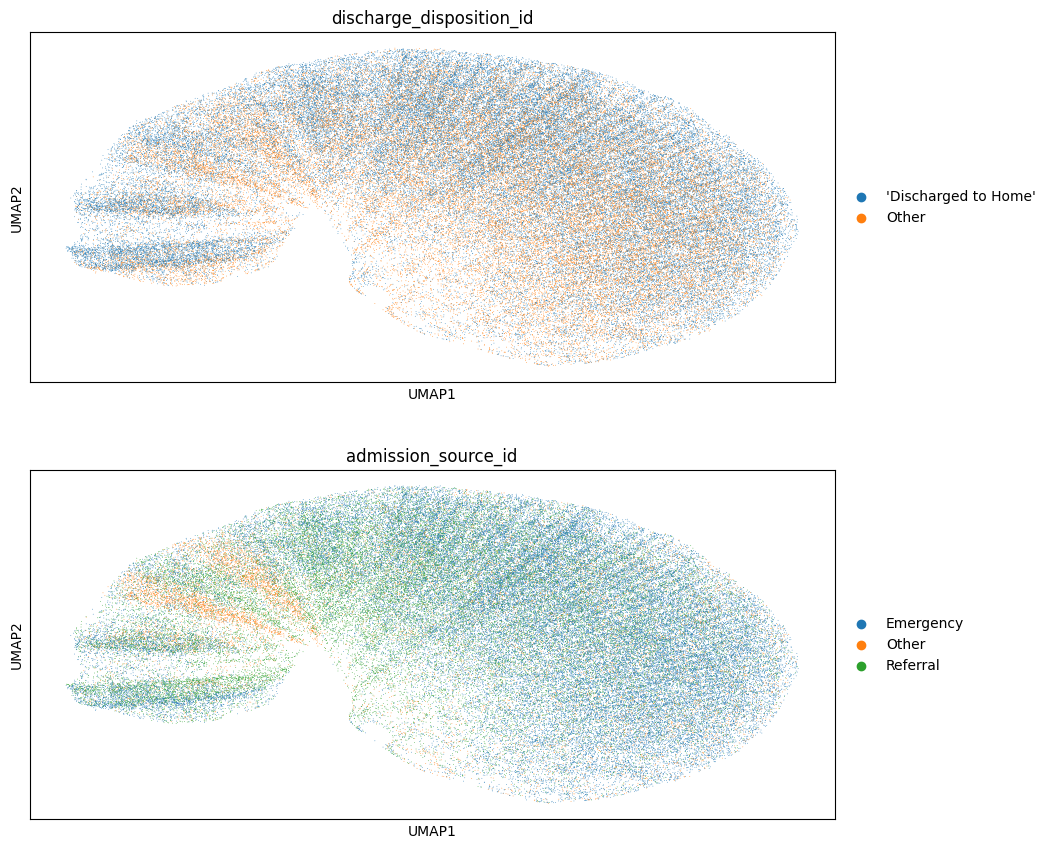

In [40]:
ep.pl.umap(
    edata,
    color=[
        "discharge_disposition_id",
        "admission_source_id",
    ],
    ncols=1,
    wspace=0.75,
)